# IBM Employee Attrition dataset

The purpose of this dataset is to analyze factors leading to employee attrition.

## 1. Exploratory Data Analysis

### 1.1. Imports

In [210]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact
import warnings

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
%matplotlib inline

### 1.2. Load dataset

In [137]:
df = pd.read_csv('employee-attrition.csv')

Inspect some example entries in the dataset

In [138]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [139]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Features:

In [140]:
print(df.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


Are there any null values among the entries? (couple of ways to do this)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [142]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [143]:
df.isnull().values.any()

False

As we can see there's no need to handle null values in the dataset

### 1.3. Feature analysis

Split dataframe to numerical and categorical features

In [144]:
cat_df = df.select_dtypes(include = 'object')
num_types = [t for t in df.dtypes.unique() if t not in cat_df.dtypes.unique()]
num_df = df.select_dtypes(include = num_types)

First let's print basic statistics about all the numerical features (like mean, std, percentiles etc.)

In [145]:
num_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We delete all the numerical features with 0 variance (all observations are the same) - they don't provide any useful information.

In [146]:
drop_labels = num_df.columns[num_df.std() == 0]
num_df.drop(columns = drop_labels, inplace = True)

We can also analyze all the numerical features that have discrete values from a very short range just like we analyze categorical features.

In [147]:
potential_cat_df = num_df[num_df.columns[num_df.nunique() <= 5]].astype('str')
reduced_num_df = num_df.drop(columns=potential_cat_df.columns)
ext_cat_df = pd.concat([cat_df, potential_cat_df], axis=1)

Let's inspect statistics about categorical features.

In [148]:
cat_df.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Just as we did above, we delete Over18 column as every employee from the dataset is older than 18.

In [149]:
drop_labels = cat_df.columns[cat_df.nunique() == 1]
cat_df.drop(columns = drop_labels, inplace = True)

Distribution plots for numerical features:

In [150]:
def num_dist_plot(feature):
    sns.distplot(df[feature])
interact(num_dist_plot, feature=reduced_num_df.columns);

interactive(children=(Dropdown(description='feature', options=('Age', 'DailyRate', 'DistanceFromHome', 'Employ…

Another column that looks like it might not be necesarry for data analysis based on the distribution plot is EmployeeNumber. The meaning of this column is probably Employee ID.

In [151]:
num_df["EmployeeNumber"].nunique()

1470

As it should be for an ID number every employee has unique one, so this attribute is redundant.

In [152]:
num_df.drop(columns = "EmployeeNumber", inplace = True)

Now let's see correlation between the features

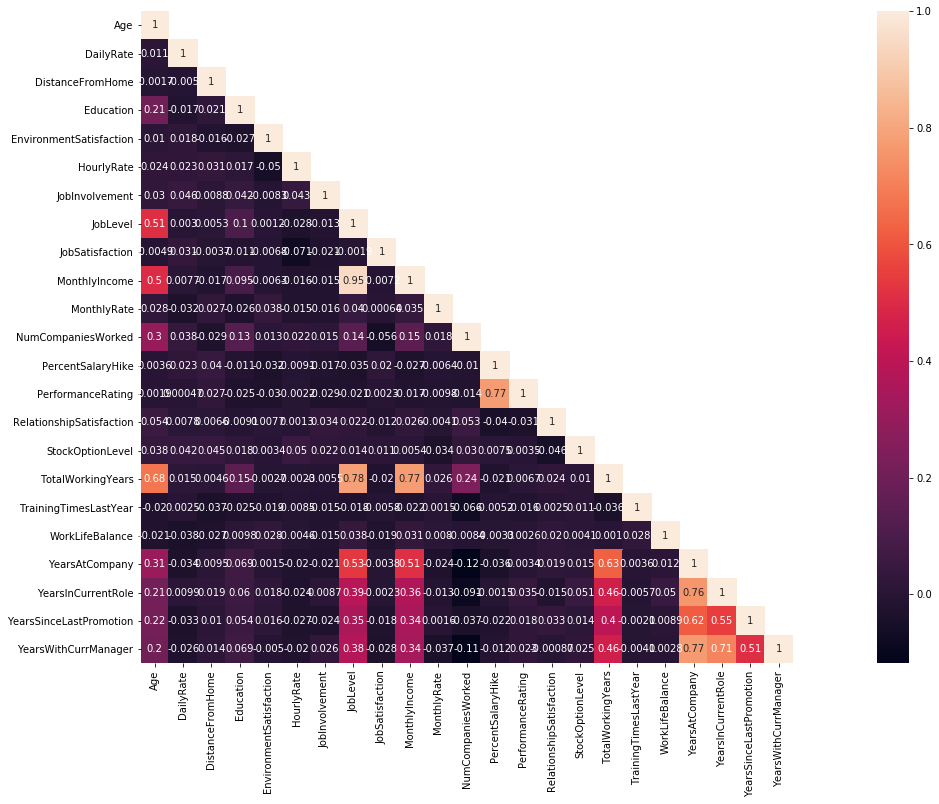

In [153]:
corr = num_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data = corr, mask = mask, square = True, annot = True, cbar = True);

Some features are predictably strongly correlated like: total working years with income and age, etc.

But some of them are unexpectedly not correlated, that is:
* monthly, hourly, daily rates and monthly income - previously if we assumed these rates meant pay per time period (hour, ...) it would suggest strong correlation. Hard to guess the meaning of those features without prior knowledge about the dataset.
* maybe less unexpected, job involvement and satisfaction is not related with salary.

Now we'll analyze the relation between the target variable and other attributes

In [154]:
temp_df = pd.concat([cat_df["Attrition"], reduced_num_df], axis=1)
def boxplot_numerical_target(feature):
    sns.boxplot(x="Attrition", y=feature, data=temp_df)

interact(boxplot_numerical_target, feature=reduced_num_df.columns);

interactive(children=(Dropdown(description='feature', options=('Age', 'DailyRate', 'DistanceFromHome', 'Employ…

Based on the plots above we can see that most of the features have some impact on attrition, but there are some like: training times last year, monthly/hourly rate, that look like they have no influence on the target variable. Because of that we can drop them (and also daily rate, even though there's some dominance of people with low daily rate that experience attrition, but as it is probably connected with two other attributes it might just be a coincidence. Without prior knowledge about the dataset we can't really understand the meaning of this feature, which might be another reason to drop these columns).

In [155]:
num_df.drop(columns=["DailyRate", "HourlyRate", "MonthlyRate", "TrainingTimesLastYear"], inplace=True)

Count plots for categorical features with attrition and cross-tabulation of these two factors:

In [156]:
def relation_to_attrition(feature):
    grouped = ext_cat_df.groupby([feature, "Attrition"])["Attrition"].count().unstack()
    grouped.plot(kind="bar", stacked=True)
    xtab = pd.crosstab(columns=ext_cat_df.Attrition, index=ext_cat_df[feature], margins=True, normalize='index')
    table = plt.table(cellText=np.round(xtab.values, 3), rowLabels=xtab.index,
            colLabels=xtab.columns, loc='top', cellLoc='center')
    table.auto_set_column_width(range(xtab.columns.size))
    fig=plt.gcf()
    fig.set_size_inches(8,6)

interact(relation_to_attrition, feature=ext_cat_df.columns.drop("Attrition"));

interactive(children=(Dropdown(description='feature', options=('BusinessTravel', 'Department', 'EducationField…

Based on the above figures we could propose couple of hypotheses (at least the more evident ones):
1. More frequently traveling employees are more likely to experience attrition
2. Employees working overtime are more likely to ...
3. Women are less likely to ...
4. Employees that are single are more likely to ...
5. Stressed employees and those in a weaker mental condition (ones that are giving lowest scores in tests related with situation at work, outside of work, work-life balance) 

Features that are left will be used to train a model to predict employee attrition.

In [157]:
selected = pd.concat([cat_df, num_df], axis=1)
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
EducationField              1470 non-null object
Gender                      1470 non-null object
JobRole                     1470 non-null object
MaritalStatus               1470 non-null object
OverTime                    1470 non-null object
Age                         1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating    

## 2. Test hypothesis

Let's check if men earn more (on similar positions).
* The null hypothesis H0: women earn equal to men
* Alternative hypothesis H1: women don't earn equal to men

To check if we can reject null hypothesis we can use two-tailed t-test. Scipy function used here to calculate this test statistic returns signed values, so if the null hypothesis is rejected we can determine which group earns more.

In [158]:
hyp_df = selected[['Gender', 'JobRole', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']]
hyp_df.info()
female = hyp_df[hyp_df.Gender == 'Female']
male = hyp_df[hyp_df.Gender == 'Male']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
Gender               1470 non-null object
JobRole              1470 non-null object
MonthlyIncome        1470 non-null int64
TotalWorkingYears    1470 non-null int64
YearsAtCompany       1470 non-null int64
dtypes: int64(3), object(2)
memory usage: 57.5+ KB


First we need to calculate the critical value for the test statistic based on level of significance and degrees of freedom.

In [159]:
from scipy import stats
from IPython.display import display

alpha = 0.1
df = len(hyp_df.index) - 2
# alpha/2, because it's a two-tailed test
crit_val = np.abs(stats.t.ppf(alpha/2, df))

Now let's check our null hypothesis regardless of any other factor.

"Can't reject null hypothesis (t_val : 1.2222619989669412, p_val : 0.22183687764870916)"

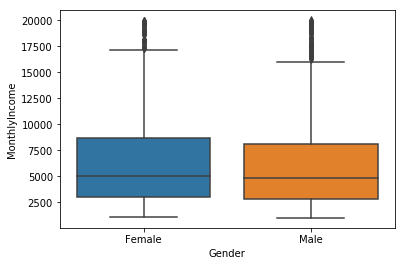

In [160]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=hyp_df);
t, p = stats.ttest_ind(female['MonthlyIncome'], male['MonthlyIncome'], equal_var=False)
if np.abs(t) < crit_val:
    display(f"Can't reject null hypothesis (t_val : {t}, p_val : {p})")
else:
    display(f"Hypothesis rejected (t_val : {t}, p_val : {p})")

It would seem in general women earn around the same as men, but we could also check if there is some difference in wages for people at certain position.

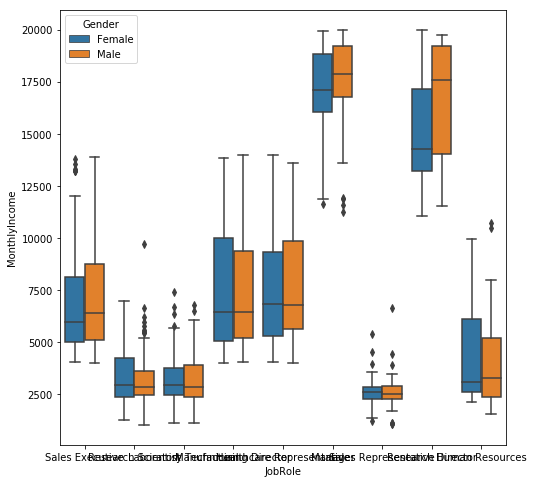

interactive(children=(Dropdown(description='position', options=('Sales Executive', 'Research Scientist', 'Labo…

In [161]:
sns.boxplot(x="JobRole", y="MonthlyIncome", hue="Gender", data=hyp_df);
fig=plt.gcf()
fig.set_size_inches(8, 8)

def test_for_position(position):
    dof = len(hyp_df[hyp_df.JobRole == position].index) - 2
    cv = np.abs(stats.t.ppf(alpha/2, dof))
    t, p = stats.ttest_ind(female[female.JobRole == position]['MonthlyIncome'], male[male.JobRole == position]['MonthlyIncome'], equal_var=False)
    if np.abs(t) < cv:
        display(f"Can't reject null hypothesis (t_val : {t}, p_val : {p})")
    else:
        display(f"Hypothesis rejected (t_val : {t}, p_val : {p})")

interact(test_for_position, position=hyp_df["JobRole"].unique());

For all the job roles except one we can't reject the null hypothesis. Only women working as Research Directors are statistically proven to earn less than men on the same position. The difference in wages seems pretty evident when we look at the box plot above.

Let's see if this difference in salaries can be explained by other factors that have strong correlation with monthly income, specifically total working years and years worked in this company.

YearsAtCompany                                                   \
                count       mean       std  min  25%   50%   75%   max   
Gender                                                                   
Female           33.0  11.636364  7.140633  1.0  6.0  11.0  18.0  27.0   
Male             47.0  10.446809  8.697347  0.0  4.0   9.0  14.0  32.0   

       TotalWorkingYears                                                    
                   count       mean       std  min   25%   50%   75%   max  
Gender                                                                      
Female              33.0  19.000000  6.986594  9.0  14.0  19.0  23.0  33.0  
Male                47.0  23.085106  8.007686  9.0  16.5  23.0  29.0  40.0

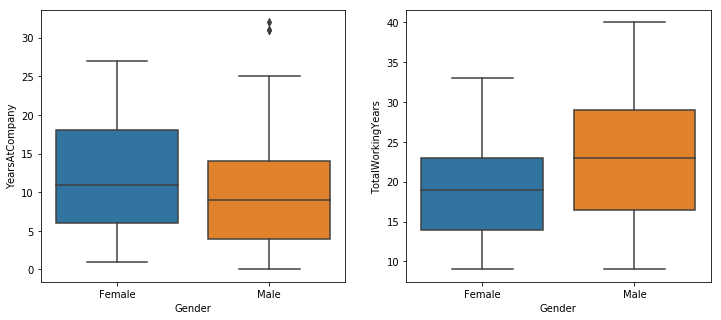

In [162]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
sns.boxplot(y="YearsAtCompany", x="Gender", data=hyp_df[hyp_df.JobRole == 'Research Director'], ax=ax[0]);
sns.boxplot(y="TotalWorkingYears", x="Gender", data=hyp_df[hyp_df.JobRole == 'Research Director'], ax=ax[1]);

hyp_df[hyp_df.JobRole == 'Research Director'].groupby('Gender')[['YearsAtCompany', 'TotalWorkingYears']].describe()

One factor that could explain the difference between the wages is the fact that men on this position have generally more years of experience.

On the other hand women Research Directors are generally working longer in this specific company, and this kind of commitment is usually rewarded by companies with higher salary.

Even though monthly income is more strongly correlated with total working years (which could explain men's higher salaries), the factor that causes difference in wages may still lie outside of this dataset.

## 3. Prepare training and test datasets

After exploratory analysis of the dataset we are left only with features that are potentially useful for predicting if the employee will experience attrition. First we have to encode the categorical features so they can be used to train a model.

In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_mask = selected.dtypes==object
cat_cols = selected.columns[cat_mask].tolist()

selected[cat_cols] = selected[cat_cols].apply(lambda col: le.fit_transform(col))

ValueError: Must have equal len keys and value when setting with an iterable

Now we will split the dataset in two parts: training and testing (80-20 split).

In [199]:
# could be also done with sklearn.model_selection.train_test_split
mask = np.random.rand(len(selected)) < 0.8
train = selected[mask]
test = selected[~mask]

y_train = train['Attrition']
x_train = train.drop(columns='Attrition')

y_test = test['Attrition']
x_test = test.drop(columns='Attrition')

Now we will train a model for predicting employee attrition. The one used below is LightGBM implementation of gradient boosting with decision trees as a weak learner. We will also look for the optimal hyperparameters for the model using grid search which chooses the best performing model based on the results of cross validation.

In [214]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

params = {
        'n_estimators' : [50, 100, 200, 500],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'subsample': [0.6, 0.8, 1.0],
        'num_leaves': [6, 8, 12, 20]
        }

gsearch = GridSearchCV(estimator = lgb.LGBMClassifier(silent=True), param_grid=params,
                       scoring='roc_auc', n_jobs=7, cv=10)

%time gsearch.fit(x_train, y_train)

Wall time: 2min 40s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=7,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.25],
             

Now let's try the best performing model on our test set.

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, balanced_accuracy_score

pred = gsearch.predict(x_test) > 0.5

metrics = {'acc' : accuracy_score(y_test, pred), 'prec' : precision_score(y_test, pred),
           'rec' : recall_score(y_test, pred), 'roc' : roc_auc_score(y_test, pred)}

metrics

{'acc': 0.9106529209621993,
 'prec': 0.8260869565217391,
 'rec': 0.4634146341463415,
 'roc': 0.7237073170731707}

Having calculated performance metrics of our model, we can see even though accuracy is pretty high, other scores don't look as good. The difference is due to the inbalance of our dataset. Based on recall value we can see that this model detects only ~46% of all employees that experience attrition. The relatively poor results could be due to hard to predict nature of human decision making, which is affected by a lot of factor. Another factor could be dishonest scores on the satisfaction tests provided by employees (job satisfaction etc.).

Below we can see the analysis of feature importance on the model prediction.

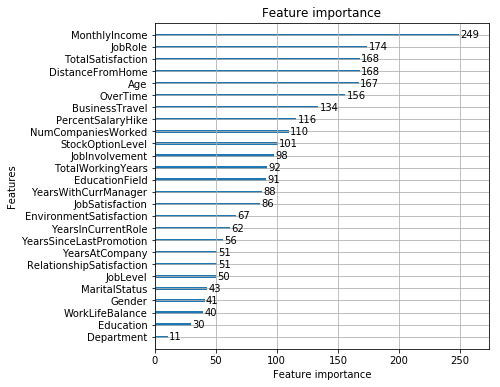

In [213]:
lgb.plot_importance(gsearch.best_estimator_, figsize=(6, 6));

As we could see from the exploratory analysis the most important features include: monthly income, distance from home, working over time, job and environment satisfaction. Performance rating of an employee and department in which his currentyl working has almost no effect on the output of the model so we could have dropped these features before training our model.